In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_tree
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
df = pd.read_csv('../Data/diabetes.csv')

### EDA

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
qqq = df[df['Outcome']==0]
zzz = df[df['Outcome']==1]

In [4]:
# plt.hist(qqq['Age']);

In [5]:
# plt.hist(zzz['Age']);

In [6]:
y = df['Outcome']
X = df[['Glucose','Age','Pregnancies']]

### Running train_test_split and setting up the DMatrix

In [7]:
X_train_whole, X_test_whole, y_train_whole, y_test_whole = train_test_split(X, y, test_size=.25)
train = xgb.DMatrix(X_train_whole,label=y_train_whole)
test = xgb.DMatrix(X_test_whole,label=y_test_whole)

### Using XGBClassifier and fitting the model

In [8]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_whole, y_train_whole)
print("Training set accuracy score:",xgb_model.score(X_train_whole, y_train_whole))
print("Test set accuracy score:",xgb_model.score(X_test_whole, y_test_whole))
y_pred = xgb_model.predict_proba(X_test_whole)

Training set accuracy score: 0.9774305555555556
Test set accuracy score: 0.7395833333333334


### Graphing the ROC Curve

In [9]:
pos_probs = y_pred[:,1]

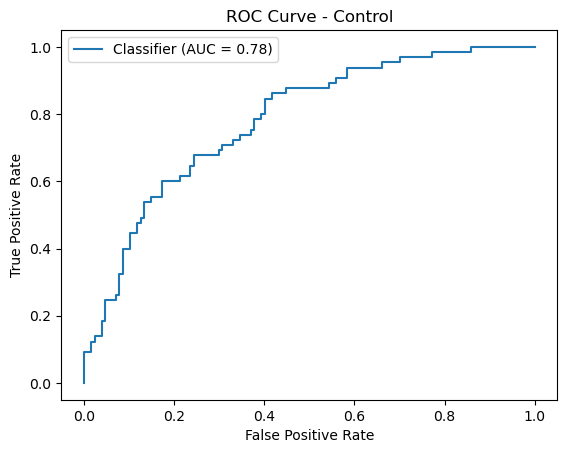

In [10]:
# plt.plot([0, 1], [0, 1], linestyle='--');
RocCurveDisplay.from_predictions(y_test_whole,pos_probs);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Control')
plt.legend()
plt.show()

# ===================================================================

### Kfold

In [11]:
kfold = KFold(n_splits=7, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kfold.split(X_train_whole):
    X_train , X_test = X_train_whole.iloc[train_index,:],X_train_whole.iloc[test_index,:]
#     X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_train_whole.iloc[train_index], y_train_whole.iloc[test_index]

    xgb_model = xgb.XGBClassifier(objective="binary:logistic")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict_proba(X_test)
    
    scores.append(xgb_model.score(X_test,y_test))
    
scores

[0.7349397590361446,
 0.7349397590361446,
 0.7560975609756098,
 0.6707317073170732,
 0.6829268292682927,
 0.7682926829268293,
 0.6585365853658537]

In [12]:
y_pred = xgb_model.predict_proba(X_test_whole)

### Graphing the ROC Curve for the KFold model

In [13]:
pos_probs = y_pred[:,1]

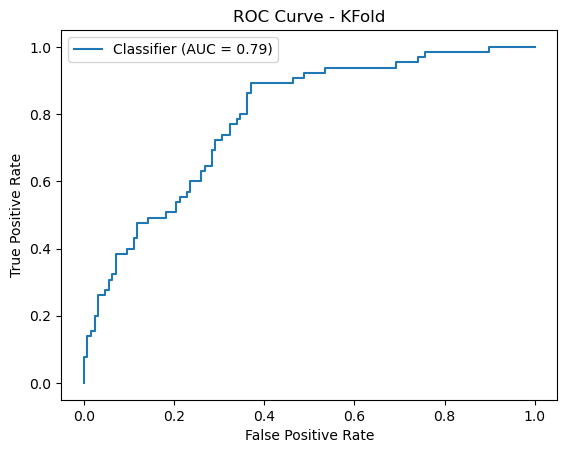

In [14]:
# plt.plot([0, 1], [0, 1], linestyle='--');
RocCurveDisplay.from_predictions(y_test_whole,pos_probs);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KFold')
plt.legend()
plt.show()

In [24]:
# plot_tree(xgb_model,num_trees=0, rankdir='LR');

plot_tree(xgb_model)
fig = plt.gcf()
fig.set_size_inches(250, 100)